# Hydrograph Development Notebooks

## First Look Analysis: Review available USGS Gage records

In [1]:
import os
from glob import glob
from importlib import reload
import utils; reload(utils)
from utils import *
%matplotlib inline

In [2]:
#--Direct Link to USGS Data & Map
GotoUSGS('NY')


CLICK HERE FOR USGS GAGES: 
 https://waterdata.usgs.gov/nwis/uv?referred_module=sw&state_cd=NY&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&format=station_list

CLICK HERE FOR MAP: 
 https://maps.waterdata.usgs.gov/mapper/index.html


In [3]:
data_dir =os.path.join(os.getcwd(), 'sample_data')

region_name = "TIOUGHNIOGA_RIVER"
output_dataset = os.path.join(data_dir, '{}.pkl'.format(region_name))
tsvs = glob(os.path.join(data_dir, '015*'))

metadata = os.path.join(data_dir ,'gage_metadata.tsv')

if metadata in tsvs:
    tsvs.remove(metadata)
    
met = pd.read_csv(metadata, sep = '\t').style
met

#### Use this cell to merge Datasets

In [4]:
#-- Read in usgs data
df = MergeDatsets(tsvs) 

print("\nGageID", '\t\t\t', 'First Available Record', '\n')

for col in df.columns:
    print(col, '\t', df[col].first_valid_index())
    
    
df.head().style    

01509000_00060_dv.tsv
01509000_00060_iv.tsv
01509000_00065_iv.tsv
01509520_00065_iv.tsv
01511500_00065_iv.tsv

GageID 			 First Available Record 

01509000_00060_dv 	 1938-05-20 12:00:00
01509000_00060_iv 	 1983-09-07 15:00:00
01509000_00065_iv 	 2007-10-01 05:00:00
01509520_00065_iv 	 2014-10-21 05:00:00
01511500_00065_iv 	 2009-10-01 05:00:00


#### Plot out Peak Statistics for each gage

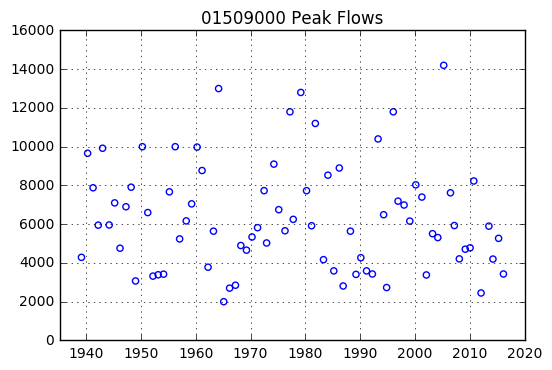

In [5]:
gage = '01509000_00060_dv'
peaks = Get_USGS_Peaks(gage.split('_')[0])
PlotPeaks(peaks, gage)    

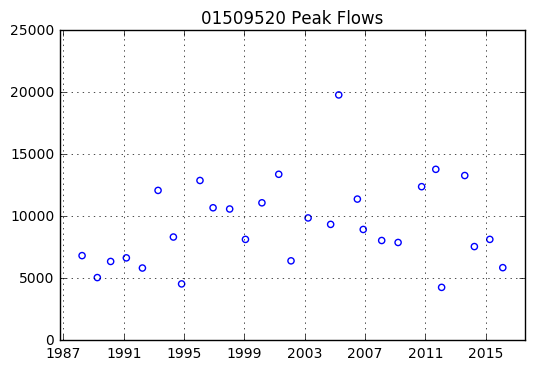

In [6]:
gage = '01509520_00065_iv'
peaks = Get_USGS_Peaks(gage.split('_')[0])
PlotPeaks(peaks, gage)   

**Regulation began for this gage in 1942, following installation of the Dam**

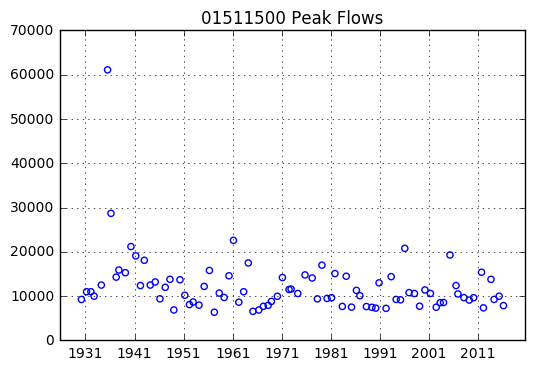

In [7]:
gage = '01511500_00065_iv'
peaks = Get_USGS_Peaks(gage.split('_')[0])
PlotPeaks(peaks, gage) 
printbold('Regulation began for this gage in 1942, following installation of the Dam')

#### Plot out Peak Storms for gage with longest record

0 2005-04-03 00:00:00 			 14200.0
1 1964-03-05 00:00:00 			 13000.0
2 1979-03-06 00:00:00 			 12800.0
3 1977-03-14 00:00:00 			 11800.0
4 1996-01-20 00:00:00 			 11800.0
5 1981-10-28 00:00:00 			 11200.0
6 1993-04-11 00:00:00 			 10400.0
7 1956-04-05 00:00:00 			 10000.0
8 1950-04-05 00:00:00 			 10000.0
9 1960-03-31 00:00:00 			 9980.0


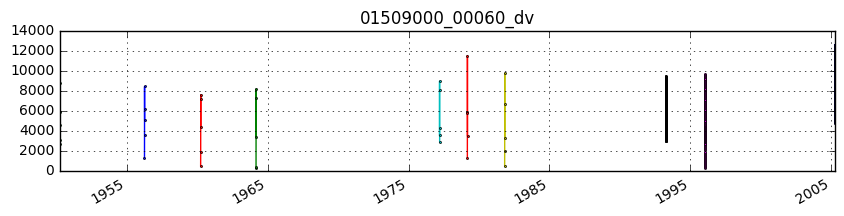

In [8]:
gage = '01509000_00060_dv'

peaks = Get_USGS_Peaks(gage.split('_')[0])
peaks.sort_values(ascending = False, inplace=True)
plt.plot()
for i in range(10):
    try:
        PlotPeak(df, peaks, i, gage, days = 2) 
        print(i, peaks.index[i], '\t\t\t', peaks.iloc[i])
    except:
        print(i, peaks.index[i], "[no data]", '\t', peaks.iloc[i])


#### Plot out Peak Storms to look at the shapes* of the hydrographs
*Interpolation using spline applied, option can be turned off

2005-04-03 00:00:00 14200.0


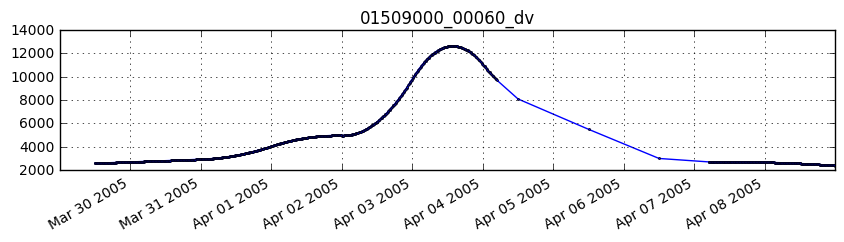

In [9]:
# Daily Plot
gage = '01509000_00060_dv'
rank = 0
PlotPeak(df, peaks, rank, gage, spline=True, days = 5)
print(peaks.index[rank], peaks.iloc[rank])

2005-04-03 00:00:00 14200.0


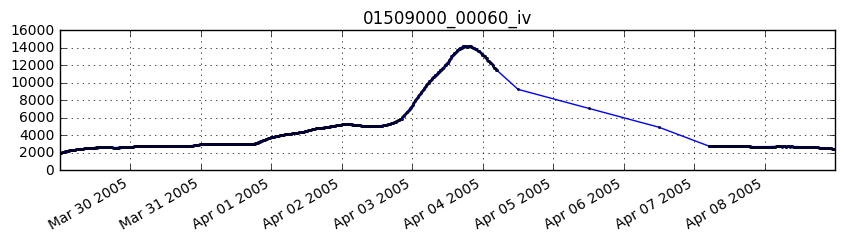

In [10]:
# Instantaneous Plot
gage = '01509000_00060_iv'
rank = 0
PlotPeak(df, peaks, rank, gage, spline=False, days = 5)
print(peaks.index[rank], peaks.iloc[rank])

#### Plot Inst & Daily to show missing data for the top event

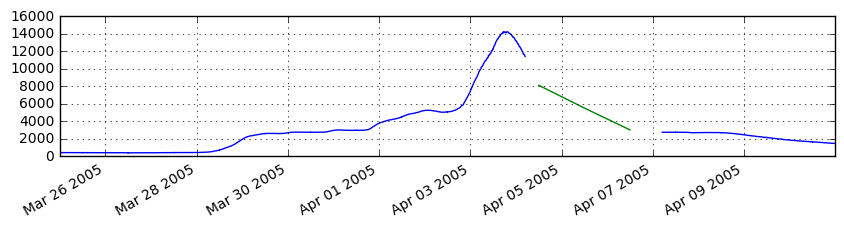

In [11]:
gage = '01509000_00060_iv'
df[gage]['2005-03-25':'2005-04-10'].plot(figsize=(10,2), grid='on')

gage = '01509000_00060_dv'
df[gage]['2005-03-25':'2005-04-10'].plot(figsize=(10,2), grid='on')

#### Plot Other Peak events where data is available

1964-03-05 00:00:00 13000.0


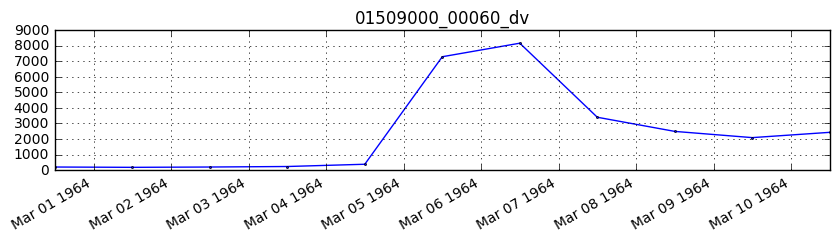

In [12]:
gage = '01509000_00060_dv'
rank = 1
PlotPeak(df, peaks, rank, gage, spline=True, days = 5)
print(peaks.index[rank], peaks.iloc[rank])

1979-03-06 00:00:00 12800.0


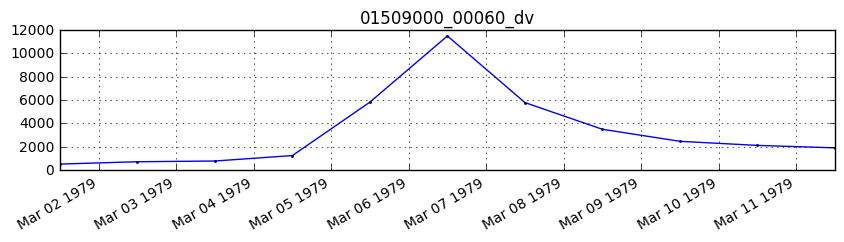

In [13]:
gage = '01509000_00060_dv'
rank = 2
PlotPeak(df, peaks, rank, gage, spline=True, days = 5)
print(peaks.index[rank], peaks.iloc[rank])

1977-03-14 00:00:00 11800.0


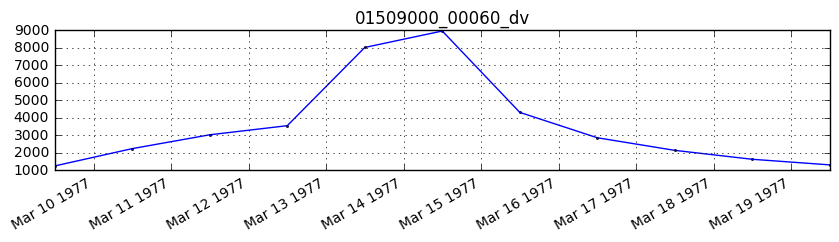

In [14]:
gage = '01509000_00060_dv'
rank = 3
PlotPeak(df, peaks, rank, gage, spline=True, days = 5)
print(peaks.index[rank], peaks.iloc[rank])

1996-01-20 00:00:00 11800.0


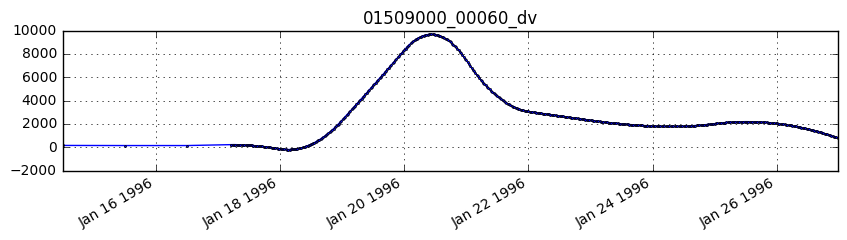

In [15]:
gage = '01509000_00060_dv'
rank = 4
PlotPeak(df, peaks, rank, gage, spline=True, days = 6)
print(peaks.index[rank], peaks.iloc[rank])

#### Look at all data for Gage of interest

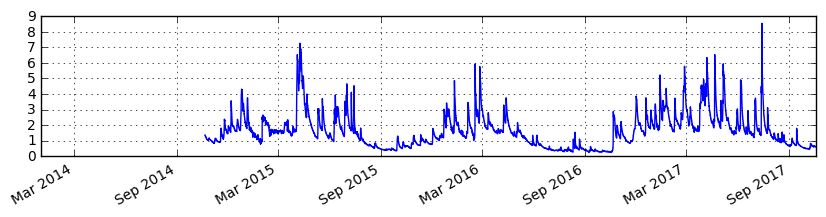

In [16]:
df['01509520_00065_iv']['2014':'2017'].plot(figsize=(10,2), grid='on')

#### Compare Hydrographs for the largest storm from the gage of interest (2017)

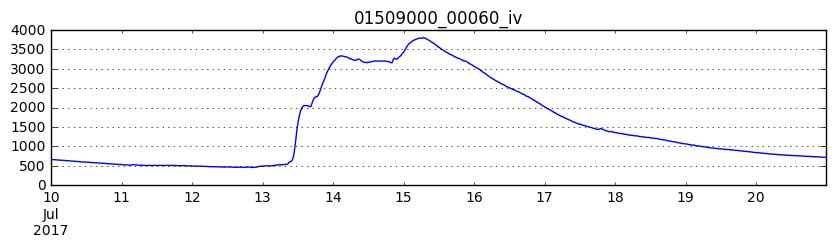

In [17]:
gage ='01509000_00060_iv'
df[gage]['2017-07-10':'2017-07-20'].interpolate().plot(figsize=(10,2), grid='on', title = gage)

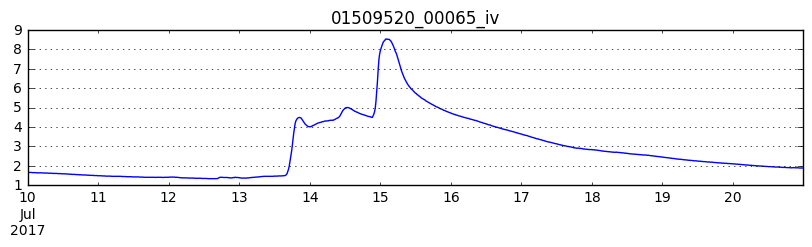

In [18]:
gage = '01509520_00065_iv'
df[gage]['2017-07-10':'2017-07-20'].plot(figsize=(10,2), grid='on', title = gage)

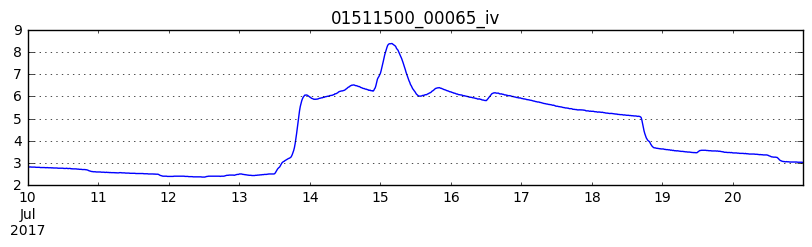

In [19]:
gage = '01511500_00065_iv'
df[gage]['2017-07-10':'2017-07-20'].plot(figsize=(10,2), grid='on', title = gage)